# Project 2: GANs
#### Malachi Eberly

In [81]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T

import torch.nn.functional as F

import torch.optim as optim

import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np
import os

### 1. Dataset Preperation

100%|██████████| 26421880/26421880 [00:04<00:00, 6126066.64it/s]


Extracting .\FashionMNIST\raw\train-images-idx3-ubyte.gz to .\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 327392.29it/s]


Extracting .\FashionMNIST\raw\train-labels-idx1-ubyte.gz to .\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4715903.77it/s]


Extracting .\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to .\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 6048256.86it/s]


Extracting .\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to .\FashionMNIST\raw



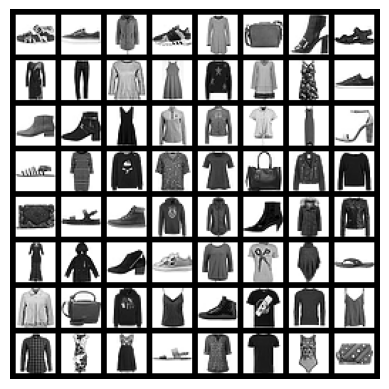

In [83]:
torch.manual_seed(42)
transform = T.Compose([
    T.ToTensor(),
    T.Normalize([0.5], [0.5])]
)

batch_size = 64

# Training set
trainset = torchvision.datasets.FashionMNIST(
    root=".", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True
)

# Show images
images, labels = next(iter(trainloader))
grid = make_grid(0.5-images/2, 8, 4)
plt.imshow(grid.numpy().transpose((1, 2, 0)),
           cmap = "gray_r")
plt.axis("off")
plt.show()

### 2. GAN Architecture

In [84]:
class Generator(nn.Module):
    
    def __init__(self):
        super(Generator, self).__init__()
        self.z_dim = 100
        self.model = nn.Sequential(
            nn.Linear(self.z_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )
    
    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), 784)
        return img

class Discriminator(nn.Module):
    
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
                nn.Linear(784, 1024),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Dropout(0.3),
                nn.Linear(1024, 512),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Dropout(0.3),
                nn.Linear(512, 256),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Dropout(0.3),
                nn.Linear(256, 128),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Dropout(0.3),
                nn.Linear(128, 1),
                nn.Sigmoid()
        )
    
    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        return validity

# Set the device and create the Generator and Discriminator
device = "cuda" if torch.cuda.is_available() else "cpu"
generator = Generator().to(device)
discriminator = Discriminator().to(device)

### 3. Loss and Optimizer

In [85]:
criterion = nn.BCELoss()

g_optimizer = optim.Adam(generator.parameters(), lr=1e-4)
d_optimizer = optim.Adam(discriminator.parameters(), lr=1e-4)

### 4. Training Loop

Epoch [1/50], Step [200/938]
Epoch [1/50], Step [400/938]
Epoch [1/50], Step [600/938]
Epoch [1/50], Step [800/938]
Epoch [1/50], Step [938/938], d_loss: 0.1247, g_loss: 2.6808


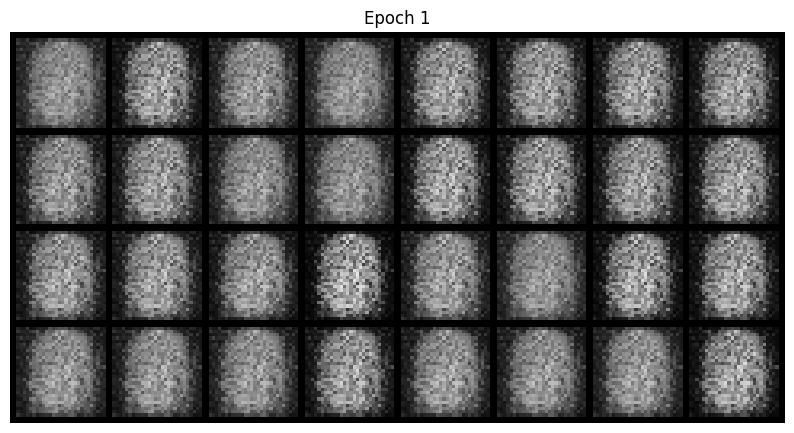

Epoch [2/50], Step [200/938]
Epoch [2/50], Step [400/938]
Epoch [2/50], Step [600/938]
Epoch [2/50], Step [800/938]
Epoch [2/50], Step [938/938], d_loss: 0.3705, g_loss: 3.5751


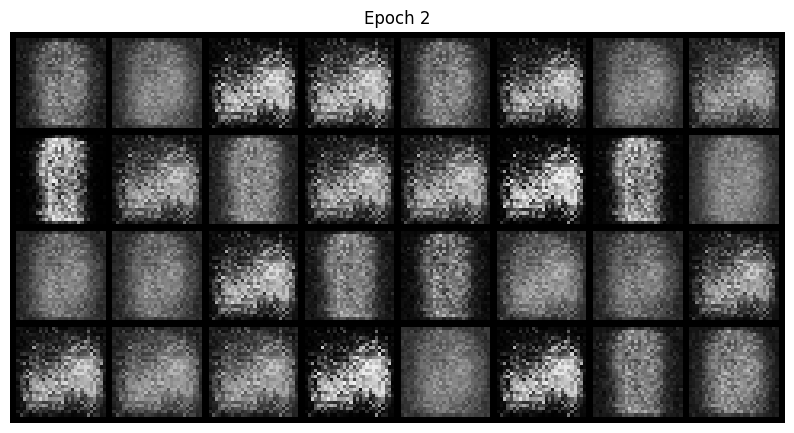

Epoch [3/50], Step [200/938]
Epoch [3/50], Step [400/938]
Epoch [3/50], Step [600/938]
Epoch [3/50], Step [800/938]
Epoch [3/50], Step [938/938], d_loss: 0.1939, g_loss: 3.5327


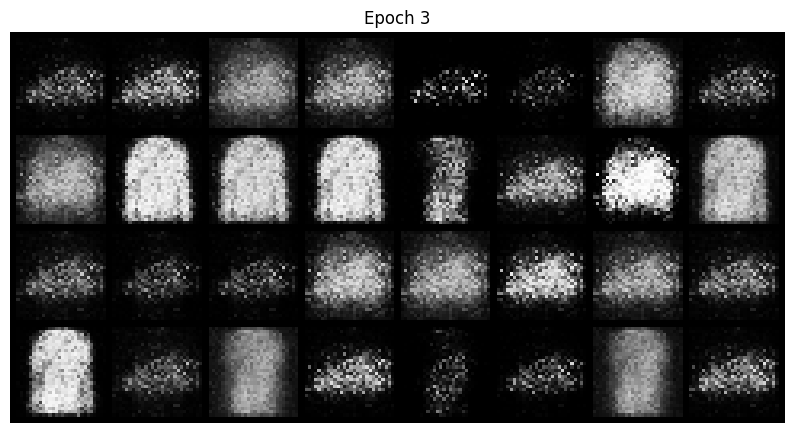

Epoch [4/50], Step [200/938]
Epoch [4/50], Step [400/938]
Epoch [4/50], Step [600/938]
Epoch [4/50], Step [800/938]
Epoch [4/50], Step [938/938], d_loss: 0.2777, g_loss: 4.3367


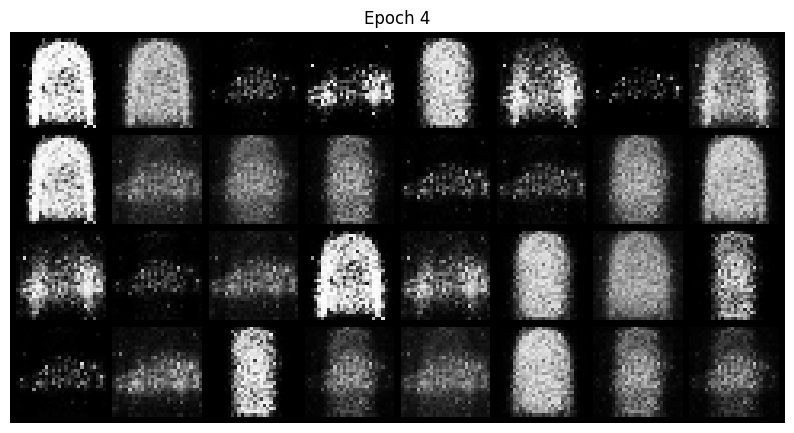

Epoch [5/50], Step [200/938]
Epoch [5/50], Step [400/938]
Epoch [5/50], Step [600/938]
Epoch [5/50], Step [800/938]
Epoch [5/50], Step [938/938], d_loss: 0.6610, g_loss: 3.4778


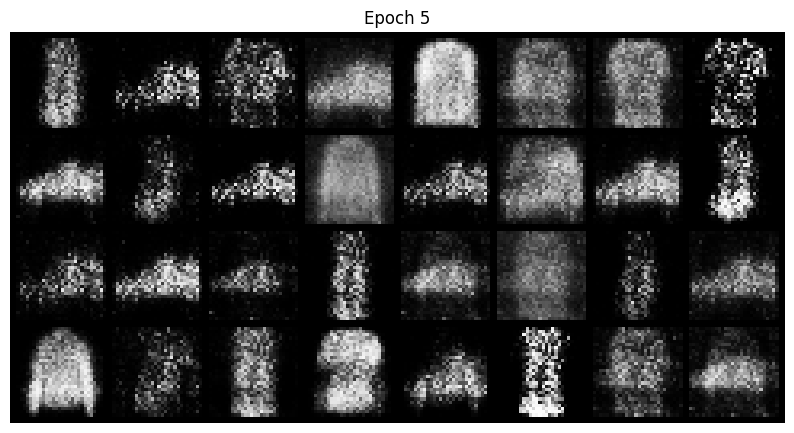

Epoch [6/50], Step [200/938]
Epoch [6/50], Step [400/938]
Epoch [6/50], Step [600/938]
Epoch [6/50], Step [800/938]
Epoch [6/50], Step [938/938], d_loss: 0.8026, g_loss: 2.0513


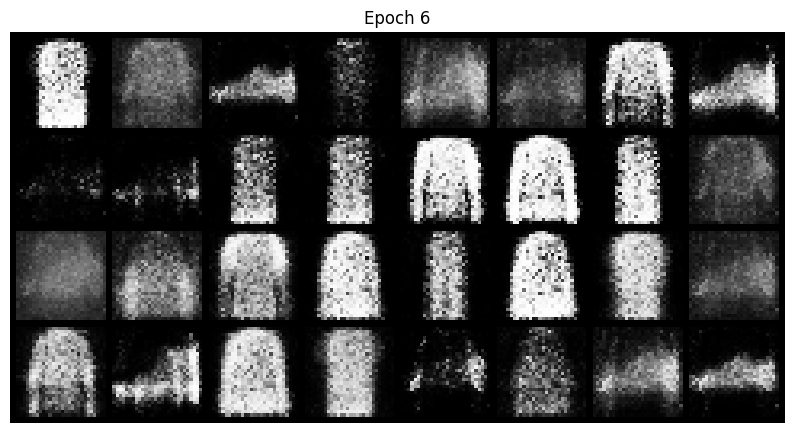

Epoch [7/50], Step [200/938]
Epoch [7/50], Step [400/938]
Epoch [7/50], Step [600/938]
Epoch [7/50], Step [800/938]
Epoch [7/50], Step [938/938], d_loss: 0.6801, g_loss: 1.8340


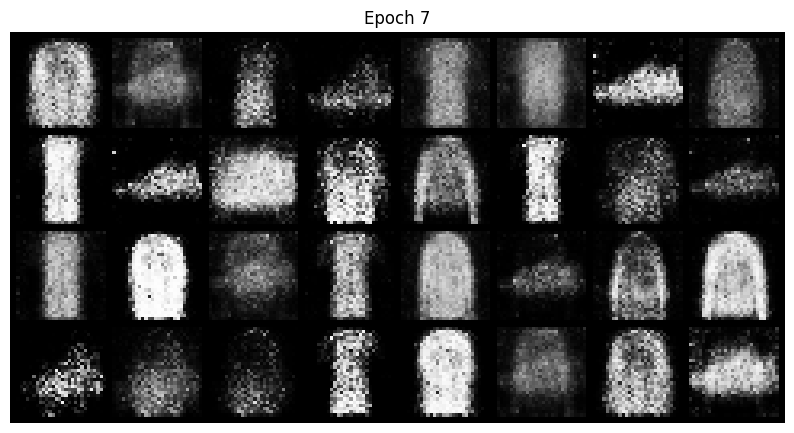

Epoch [8/50], Step [200/938]
Epoch [8/50], Step [400/938]
Epoch [8/50], Step [600/938]
Epoch [8/50], Step [800/938]
Epoch [8/50], Step [938/938], d_loss: 0.6120, g_loss: 1.6108


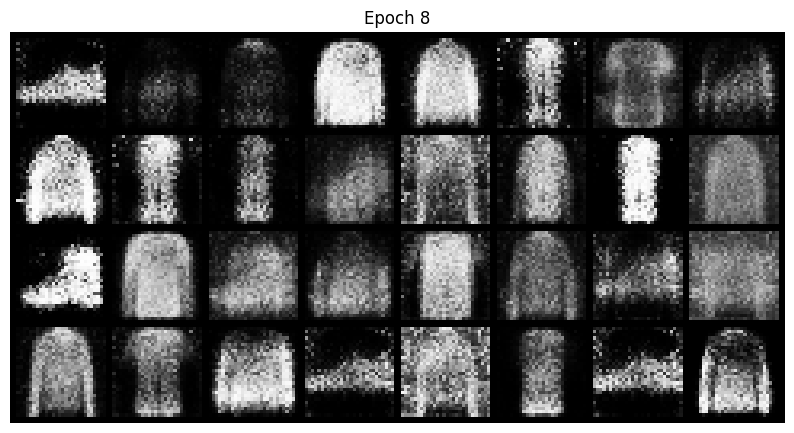

Epoch [9/50], Step [200/938]
Epoch [9/50], Step [400/938]
Epoch [9/50], Step [600/938]
Epoch [9/50], Step [800/938]
Epoch [9/50], Step [938/938], d_loss: 0.6487, g_loss: 2.0455


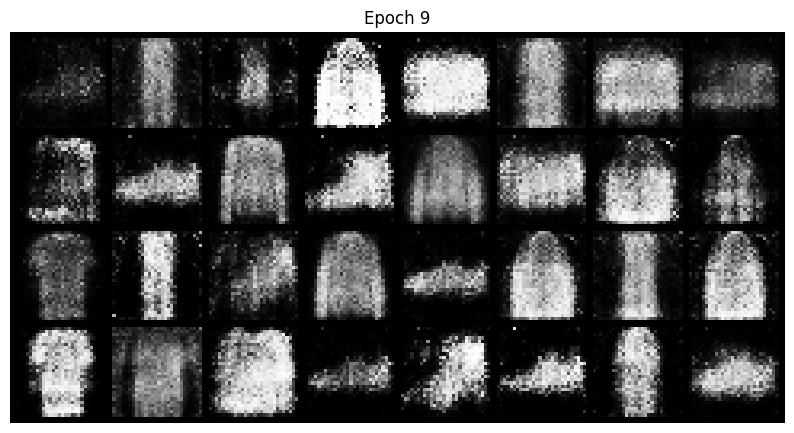

Epoch [10/50], Step [200/938]
Epoch [10/50], Step [400/938]
Epoch [10/50], Step [600/938]
Epoch [10/50], Step [800/938]
Epoch [10/50], Step [938/938], d_loss: 0.6508, g_loss: 2.0909


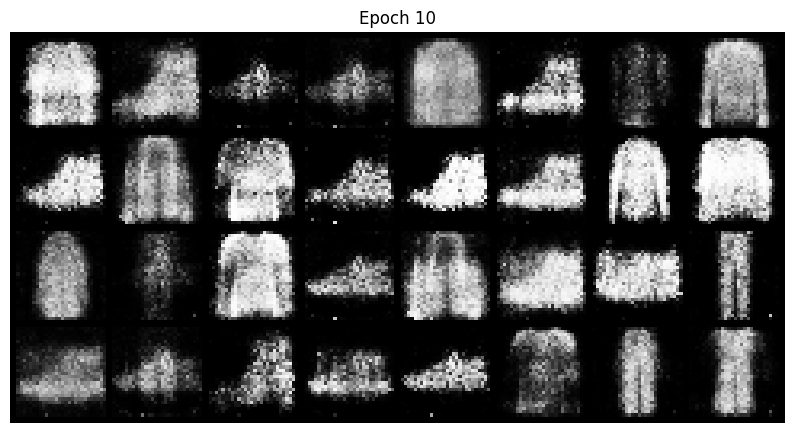

Saving checkpoint 10
Epoch [11/50], Step [200/938]
Epoch [11/50], Step [400/938]
Epoch [11/50], Step [600/938]
Epoch [11/50], Step [800/938]
Epoch [11/50], Step [938/938], d_loss: 0.9006, g_loss: 1.4724


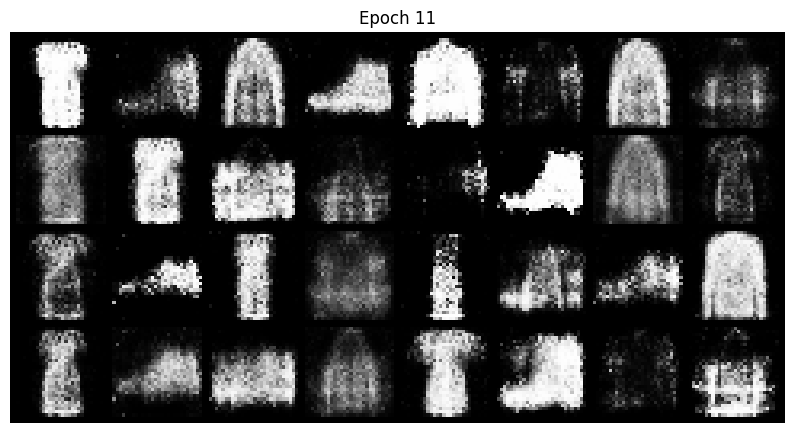

Epoch [12/50], Step [200/938]
Epoch [12/50], Step [400/938]
Epoch [12/50], Step [600/938]
Epoch [12/50], Step [800/938]
Epoch [12/50], Step [938/938], d_loss: 0.7995, g_loss: 1.6616


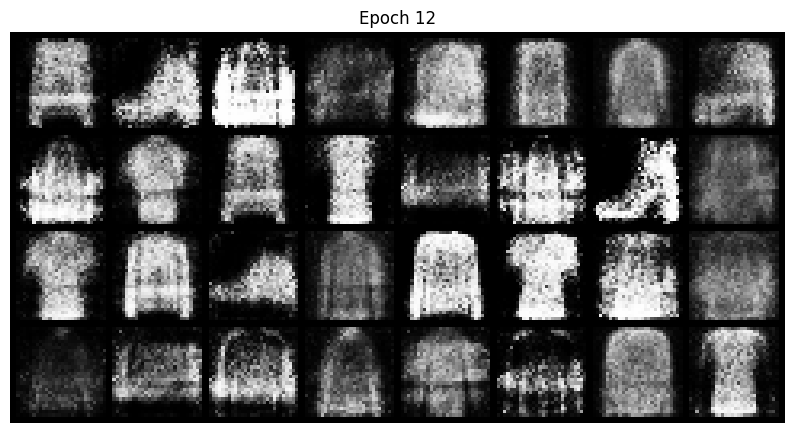

Epoch [13/50], Step [200/938]
Epoch [13/50], Step [400/938]
Epoch [13/50], Step [600/938]
Epoch [13/50], Step [800/938]
Epoch [13/50], Step [938/938], d_loss: 1.2012, g_loss: 1.9052


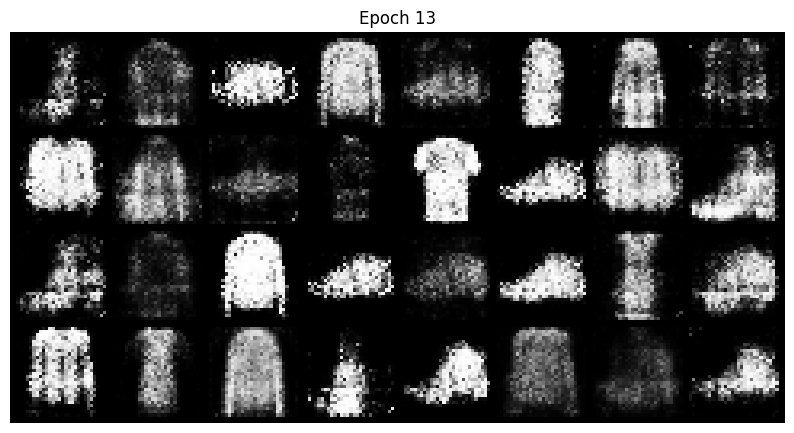

Epoch [14/50], Step [200/938]
Epoch [14/50], Step [400/938]
Epoch [14/50], Step [600/938]
Epoch [14/50], Step [800/938]
Epoch [14/50], Step [938/938], d_loss: 0.7180, g_loss: 1.7086


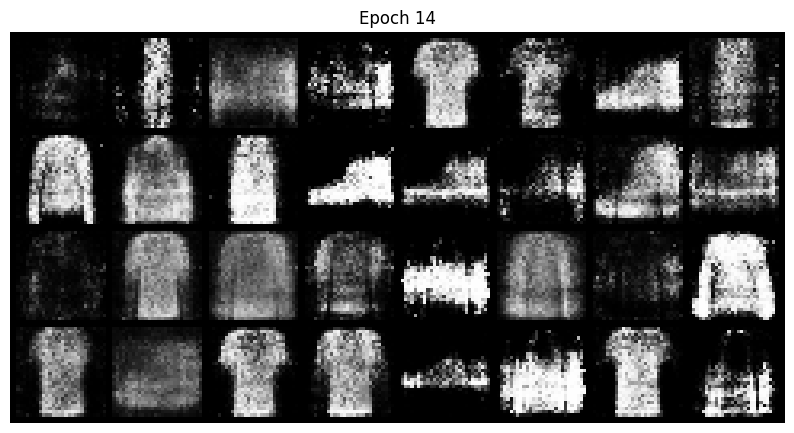

Epoch [15/50], Step [200/938]
Epoch [15/50], Step [400/938]
Epoch [15/50], Step [600/938]
Epoch [15/50], Step [800/938]
Epoch [15/50], Step [938/938], d_loss: 1.0758, g_loss: 1.4136


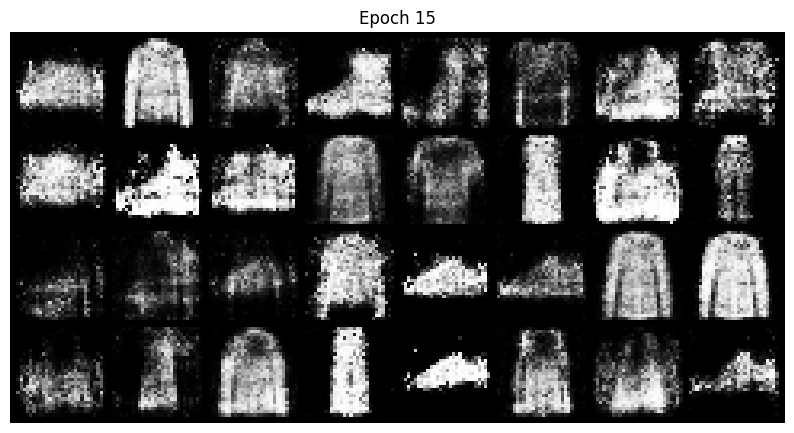

Epoch [16/50], Step [200/938]
Epoch [16/50], Step [400/938]
Epoch [16/50], Step [600/938]
Epoch [16/50], Step [800/938]
Epoch [16/50], Step [938/938], d_loss: 0.8896, g_loss: 1.7729


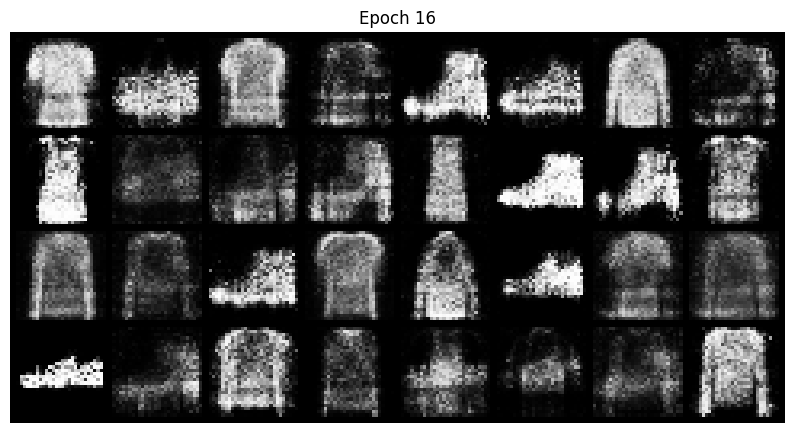

Epoch [17/50], Step [200/938]
Epoch [17/50], Step [400/938]
Epoch [17/50], Step [600/938]
Epoch [17/50], Step [800/938]
Epoch [17/50], Step [938/938], d_loss: 0.7344, g_loss: 1.8648


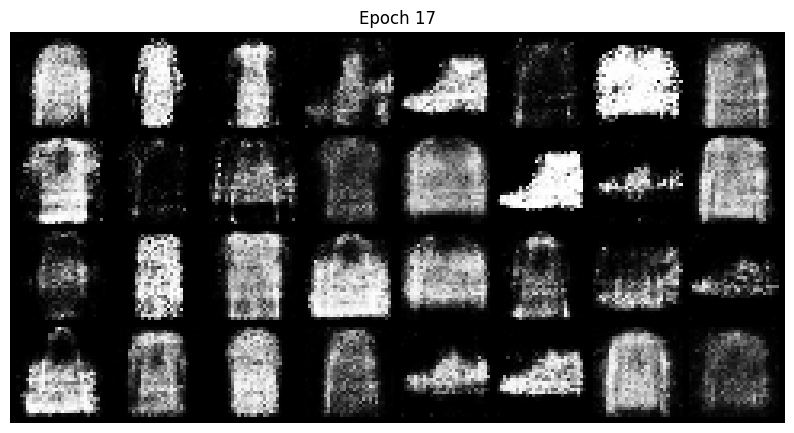

Epoch [18/50], Step [200/938]
Epoch [18/50], Step [400/938]
Epoch [18/50], Step [600/938]
Epoch [18/50], Step [800/938]
Epoch [18/50], Step [938/938], d_loss: 0.4604, g_loss: 2.1441


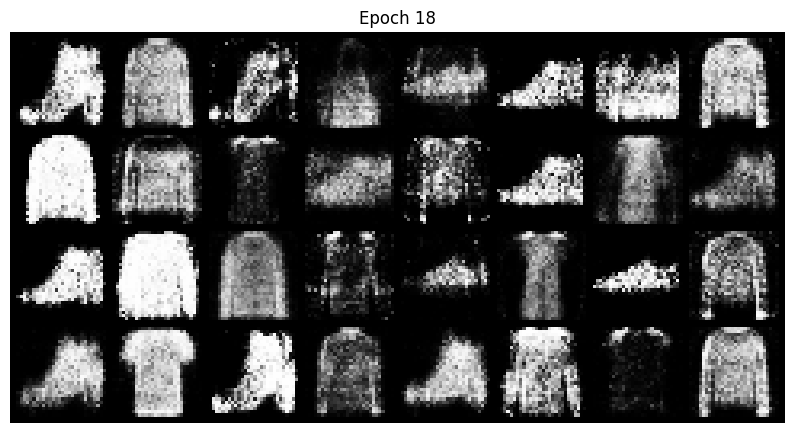

Epoch [19/50], Step [200/938]
Epoch [19/50], Step [400/938]
Epoch [19/50], Step [600/938]
Epoch [19/50], Step [800/938]
Epoch [19/50], Step [938/938], d_loss: 0.9440, g_loss: 1.4611


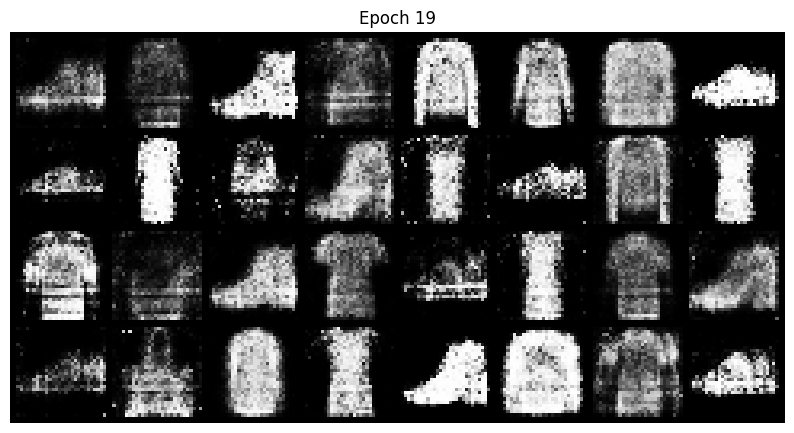

Epoch [20/50], Step [200/938]
Epoch [20/50], Step [400/938]
Epoch [20/50], Step [600/938]
Epoch [20/50], Step [800/938]
Epoch [20/50], Step [938/938], d_loss: 1.0536, g_loss: 1.6101


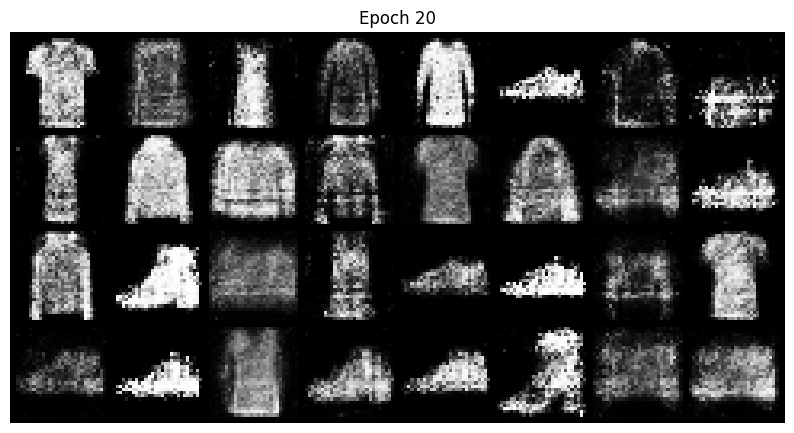

Saving checkpoint 20
Epoch [21/50], Step [200/938]
Epoch [21/50], Step [400/938]
Epoch [21/50], Step [600/938]
Epoch [21/50], Step [800/938]
Epoch [21/50], Step [938/938], d_loss: 0.9486, g_loss: 1.2945


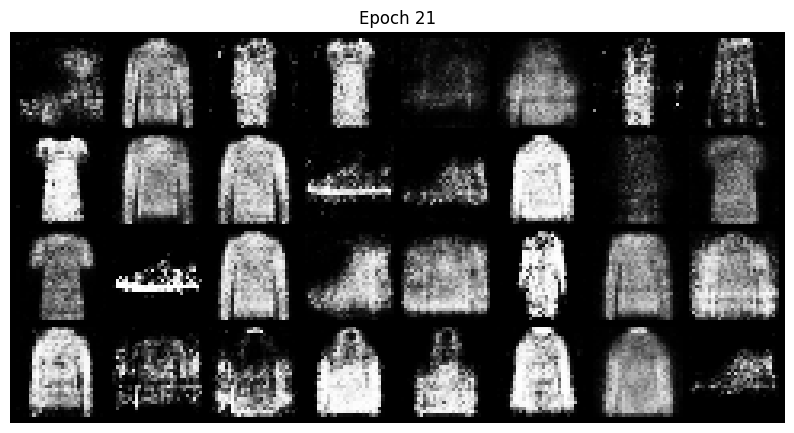

Epoch [22/50], Step [200/938]
Epoch [22/50], Step [400/938]
Epoch [22/50], Step [600/938]
Epoch [22/50], Step [800/938]
Epoch [22/50], Step [938/938], d_loss: 1.0110, g_loss: 1.6009


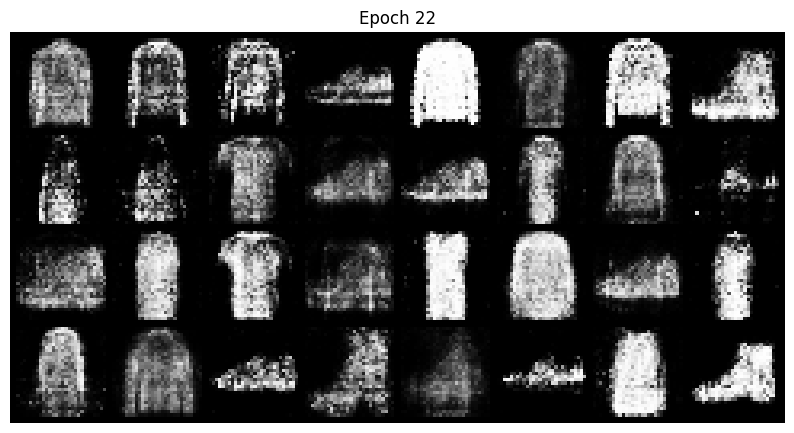

Epoch [23/50], Step [200/938]
Epoch [23/50], Step [400/938]
Epoch [23/50], Step [600/938]
Epoch [23/50], Step [800/938]
Epoch [23/50], Step [938/938], d_loss: 1.0407, g_loss: 1.3165


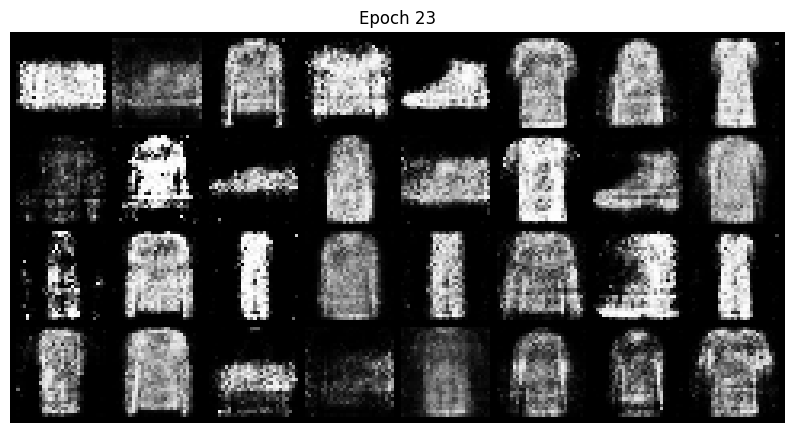

Epoch [24/50], Step [200/938]
Epoch [24/50], Step [400/938]
Epoch [24/50], Step [600/938]
Epoch [24/50], Step [800/938]
Epoch [24/50], Step [938/938], d_loss: 0.8434, g_loss: 1.1679


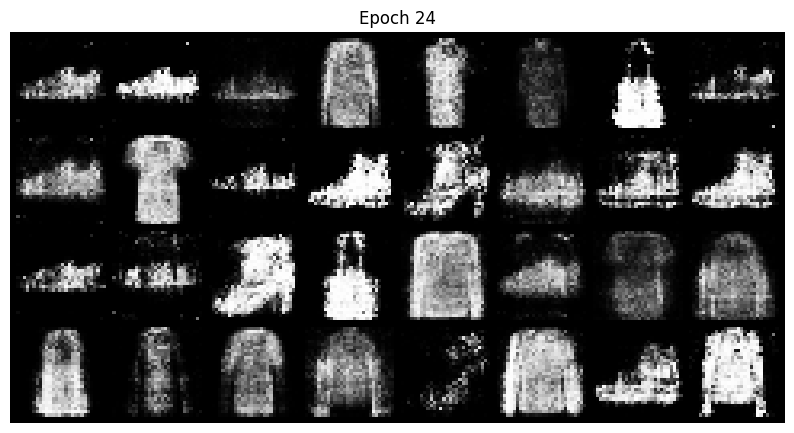

Epoch [25/50], Step [200/938]
Epoch [25/50], Step [400/938]
Epoch [25/50], Step [600/938]
Epoch [25/50], Step [800/938]
Epoch [25/50], Step [938/938], d_loss: 0.6974, g_loss: 1.1992


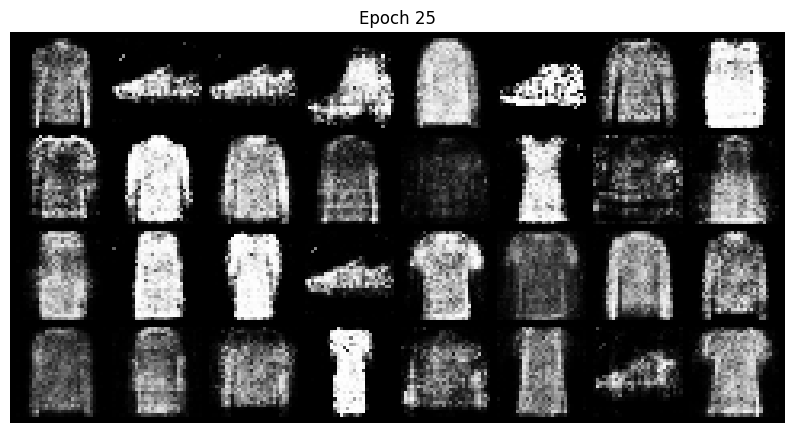

Epoch [26/50], Step [200/938]
Epoch [26/50], Step [400/938]
Epoch [26/50], Step [600/938]
Epoch [26/50], Step [800/938]
Epoch [26/50], Step [938/938], d_loss: 1.0201, g_loss: 1.3893


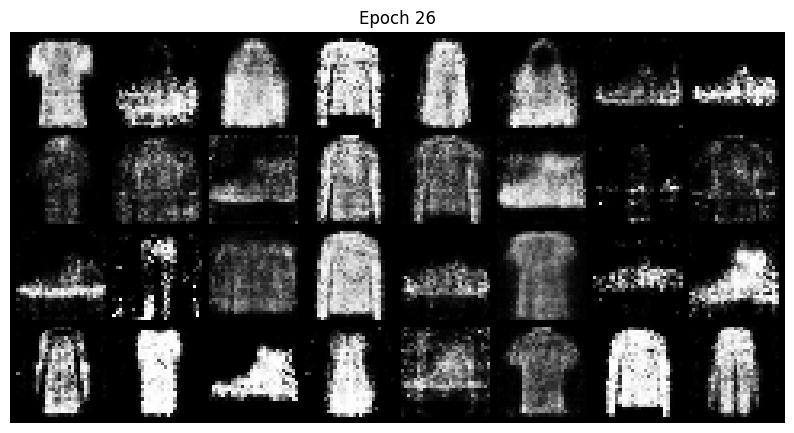

Epoch [27/50], Step [200/938]
Epoch [27/50], Step [400/938]
Epoch [27/50], Step [600/938]
Epoch [27/50], Step [800/938]
Epoch [27/50], Step [938/938], d_loss: 1.1263, g_loss: 1.4777


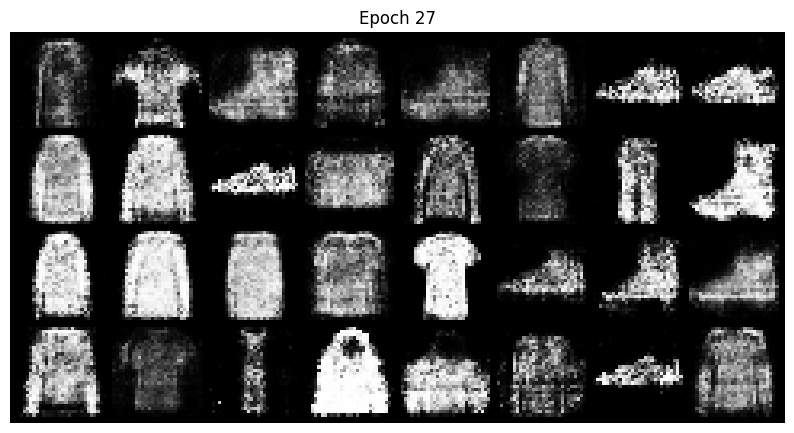

Epoch [28/50], Step [200/938]
Epoch [28/50], Step [400/938]
Epoch [28/50], Step [600/938]
Epoch [28/50], Step [800/938]
Epoch [28/50], Step [938/938], d_loss: 1.0131, g_loss: 1.3117


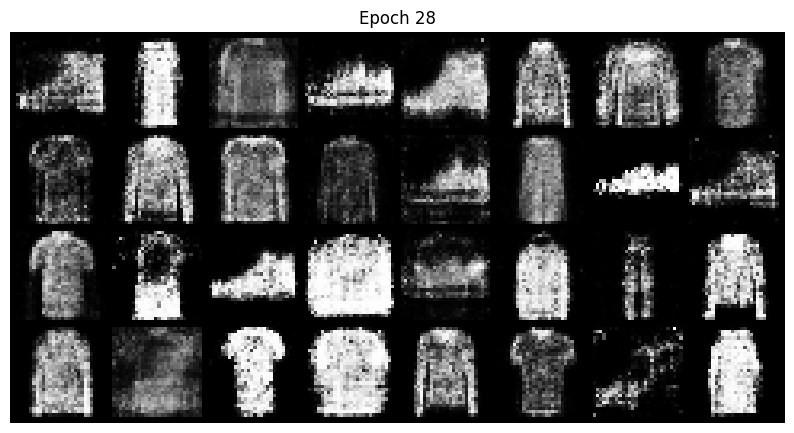

Epoch [29/50], Step [200/938]
Epoch [29/50], Step [400/938]
Epoch [29/50], Step [600/938]
Epoch [29/50], Step [800/938]
Epoch [29/50], Step [938/938], d_loss: 1.0592, g_loss: 1.2904


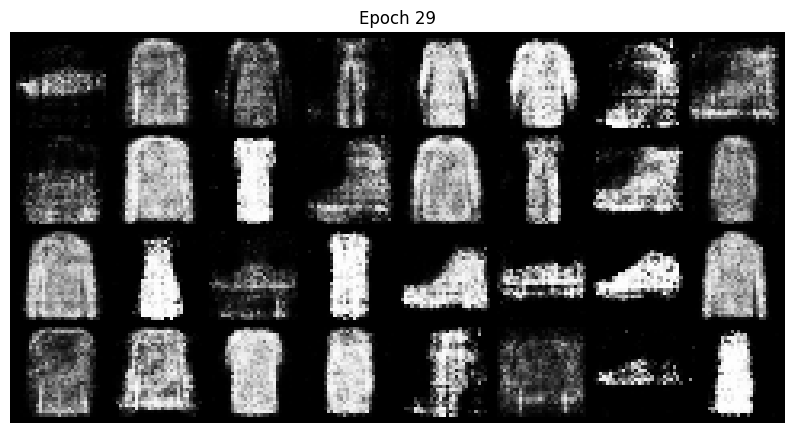

Epoch [30/50], Step [200/938]
Epoch [30/50], Step [400/938]
Epoch [30/50], Step [600/938]
Epoch [30/50], Step [800/938]
Epoch [30/50], Step [938/938], d_loss: 1.1271, g_loss: 1.2068


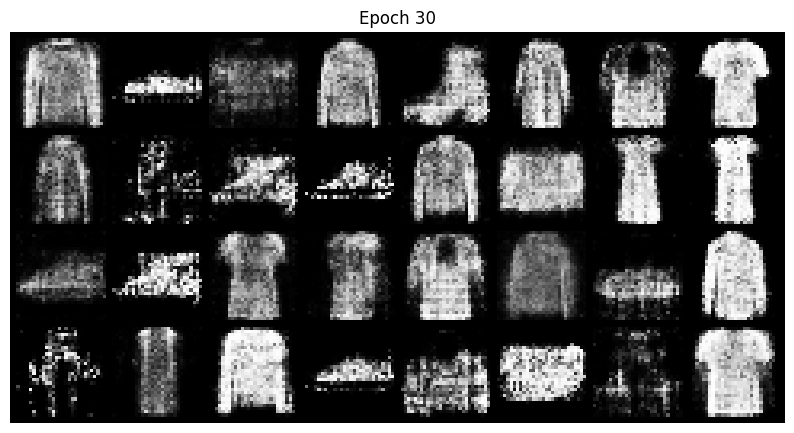

Saving checkpoint 30
Epoch [31/50], Step [200/938]
Epoch [31/50], Step [400/938]
Epoch [31/50], Step [600/938]
Epoch [31/50], Step [800/938]
Epoch [31/50], Step [938/938], d_loss: 0.9351, g_loss: 1.2564


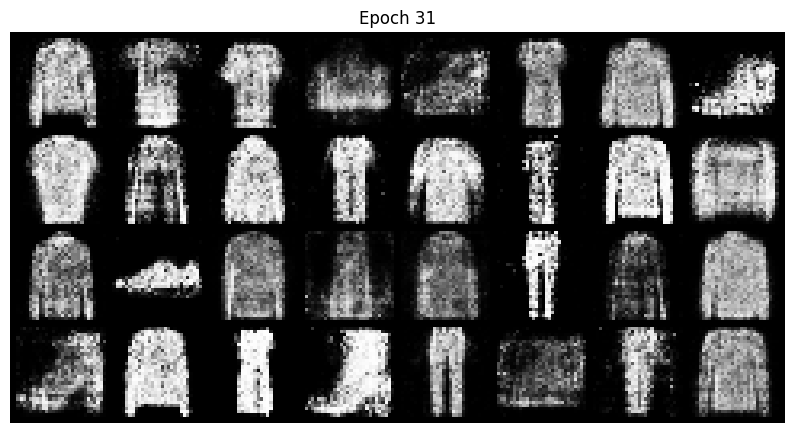

Epoch [32/50], Step [200/938]
Epoch [32/50], Step [400/938]
Epoch [32/50], Step [600/938]
Epoch [32/50], Step [800/938]
Epoch [32/50], Step [938/938], d_loss: 1.1227, g_loss: 1.2572


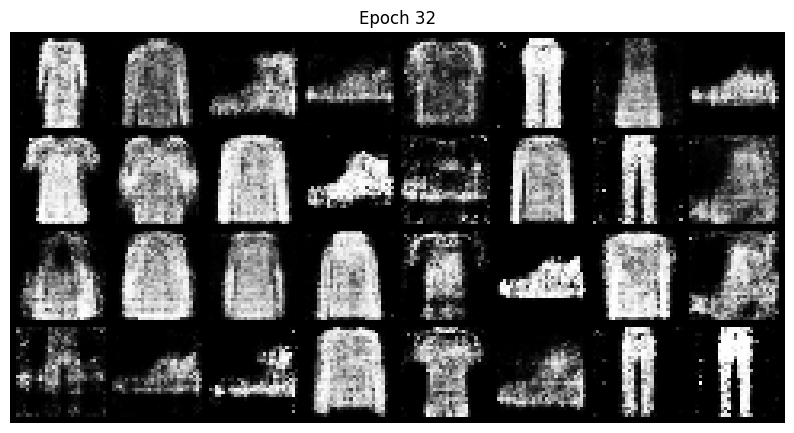

Epoch [33/50], Step [200/938]
Epoch [33/50], Step [400/938]
Epoch [33/50], Step [600/938]
Epoch [33/50], Step [800/938]
Epoch [33/50], Step [938/938], d_loss: 1.1309, g_loss: 1.0791


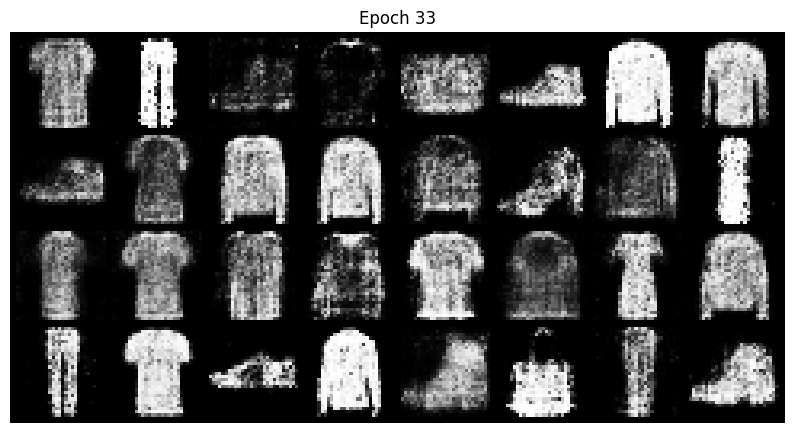

Epoch [34/50], Step [200/938]
Epoch [34/50], Step [400/938]
Epoch [34/50], Step [600/938]
Epoch [34/50], Step [800/938]
Epoch [34/50], Step [938/938], d_loss: 0.9677, g_loss: 1.3172


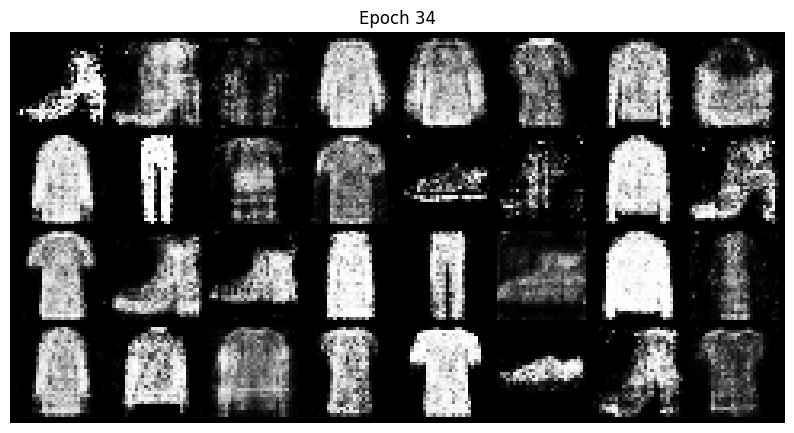

Epoch [35/50], Step [200/938]
Epoch [35/50], Step [400/938]
Epoch [35/50], Step [600/938]
Epoch [35/50], Step [800/938]
Epoch [35/50], Step [938/938], d_loss: 1.0098, g_loss: 1.2162


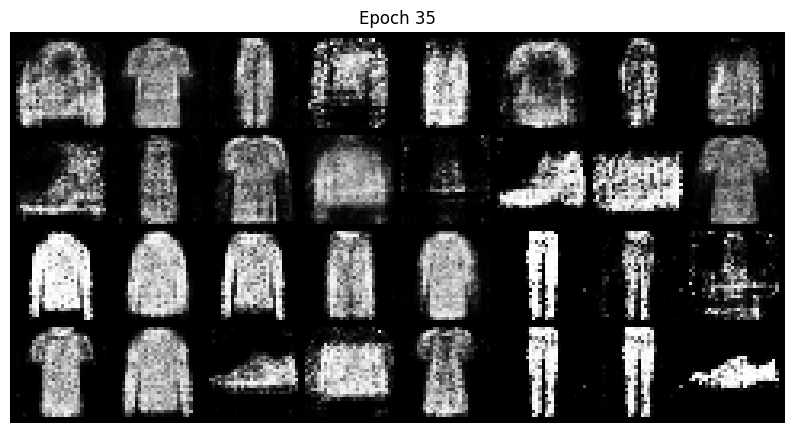

Epoch [36/50], Step [200/938]
Epoch [36/50], Step [400/938]
Epoch [36/50], Step [600/938]
Epoch [36/50], Step [800/938]
Epoch [36/50], Step [938/938], d_loss: 0.9723, g_loss: 1.1275


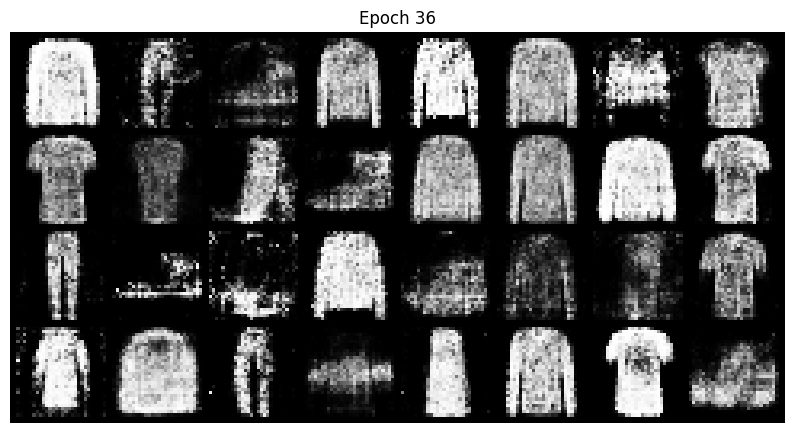

Epoch [37/50], Step [200/938]
Epoch [37/50], Step [400/938]
Epoch [37/50], Step [600/938]
Epoch [37/50], Step [800/938]
Epoch [37/50], Step [938/938], d_loss: 1.0242, g_loss: 1.0759


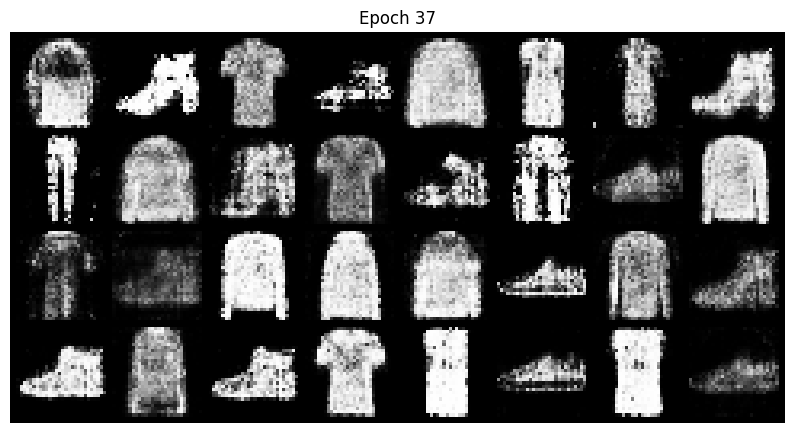

Epoch [38/50], Step [200/938]
Epoch [38/50], Step [400/938]
Epoch [38/50], Step [600/938]
Epoch [38/50], Step [800/938]
Epoch [38/50], Step [938/938], d_loss: 1.1184, g_loss: 1.2671


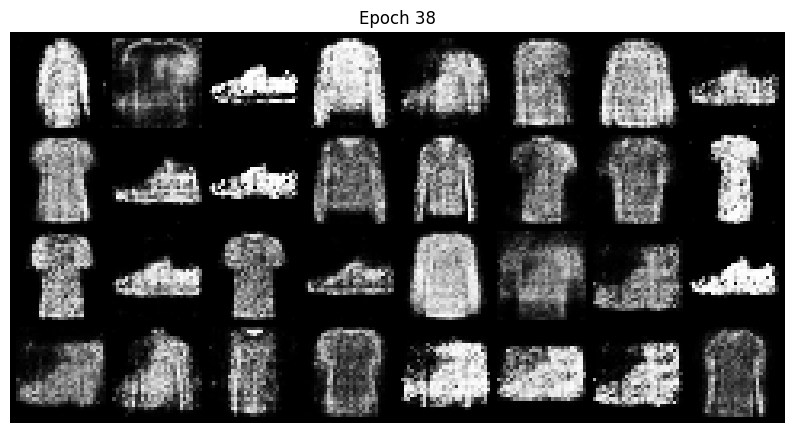

Epoch [39/50], Step [200/938]
Epoch [39/50], Step [400/938]
Epoch [39/50], Step [600/938]
Epoch [39/50], Step [800/938]
Epoch [39/50], Step [938/938], d_loss: 1.1590, g_loss: 1.3254


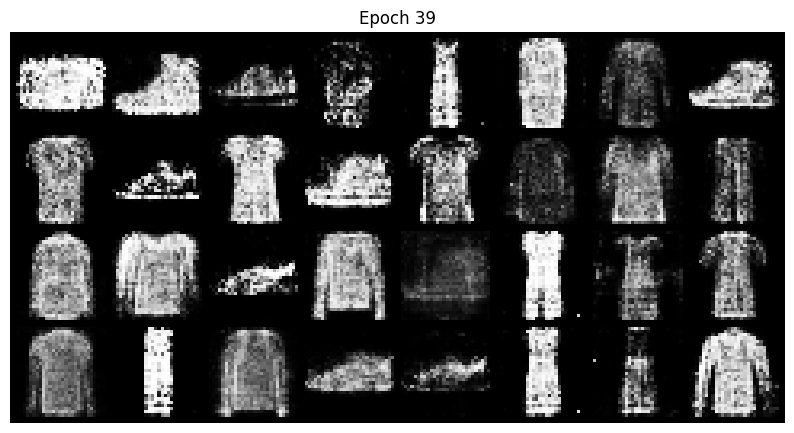

Epoch [40/50], Step [200/938]
Epoch [40/50], Step [400/938]
Epoch [40/50], Step [600/938]
Epoch [40/50], Step [800/938]
Epoch [40/50], Step [938/938], d_loss: 1.0382, g_loss: 1.2496


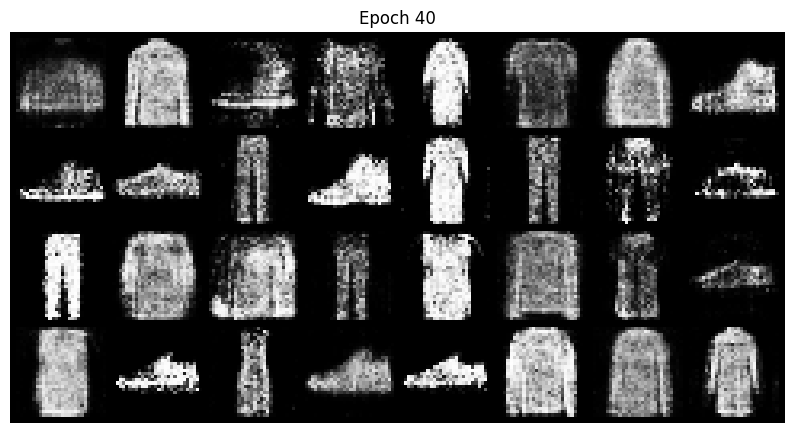

Saving checkpoint 40
Epoch [41/50], Step [200/938]
Epoch [41/50], Step [400/938]
Epoch [41/50], Step [600/938]
Epoch [41/50], Step [800/938]
Epoch [41/50], Step [938/938], d_loss: 1.2934, g_loss: 0.8560


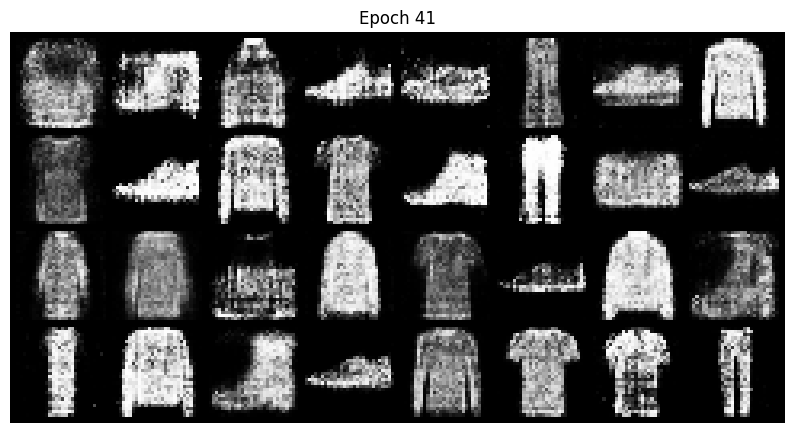

Epoch [42/50], Step [200/938]
Epoch [42/50], Step [400/938]
Epoch [42/50], Step [600/938]
Epoch [42/50], Step [800/938]
Epoch [42/50], Step [938/938], d_loss: 1.0827, g_loss: 0.9368


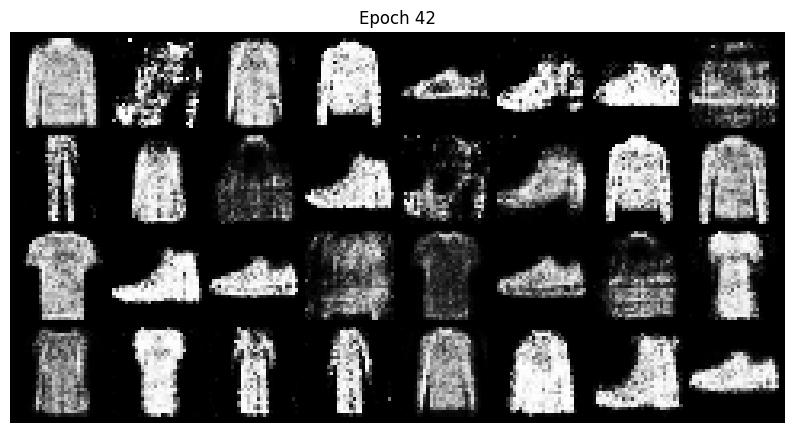

Epoch [43/50], Step [200/938]
Epoch [43/50], Step [400/938]
Epoch [43/50], Step [600/938]
Epoch [43/50], Step [800/938]
Epoch [43/50], Step [938/938], d_loss: 1.1097, g_loss: 1.0209


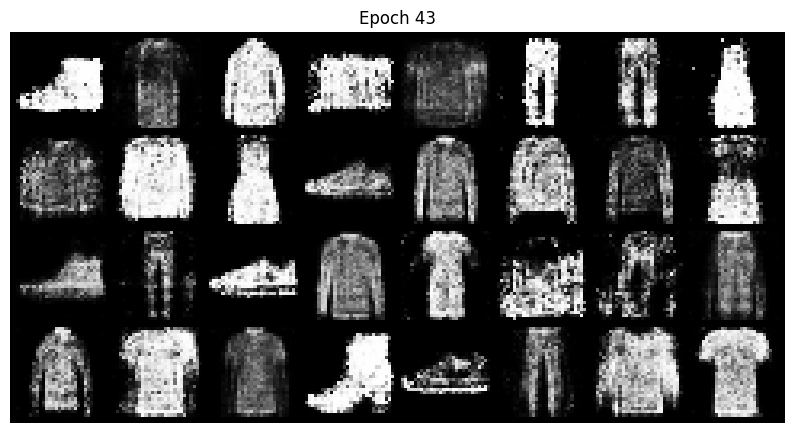

Epoch [44/50], Step [200/938]
Epoch [44/50], Step [400/938]
Epoch [44/50], Step [600/938]
Epoch [44/50], Step [800/938]
Epoch [44/50], Step [938/938], d_loss: 1.1092, g_loss: 1.1315


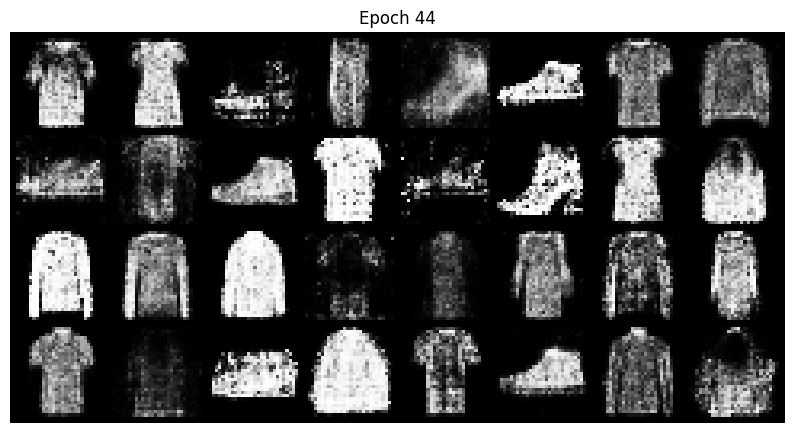

Epoch [45/50], Step [200/938]
Epoch [45/50], Step [400/938]
Epoch [45/50], Step [600/938]
Epoch [45/50], Step [800/938]
Epoch [45/50], Step [938/938], d_loss: 1.2873, g_loss: 0.9179


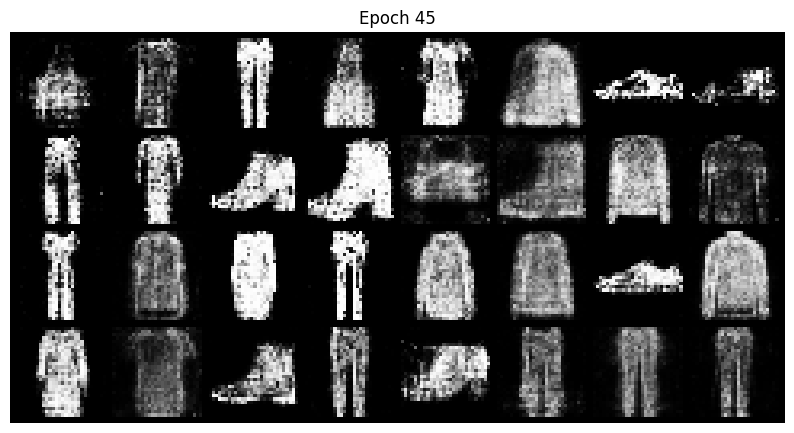

Epoch [46/50], Step [200/938]
Epoch [46/50], Step [400/938]
Epoch [46/50], Step [600/938]
Epoch [46/50], Step [800/938]
Epoch [46/50], Step [938/938], d_loss: 1.3107, g_loss: 0.9724


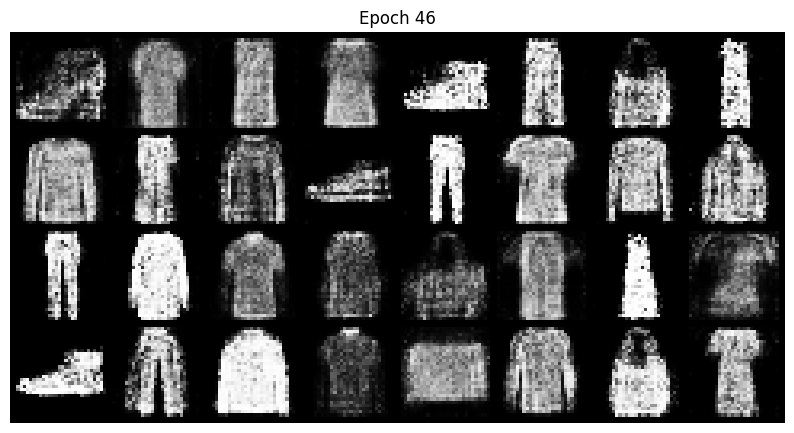

Epoch [47/50], Step [200/938]
Epoch [47/50], Step [400/938]
Epoch [47/50], Step [600/938]
Epoch [47/50], Step [800/938]
Epoch [47/50], Step [938/938], d_loss: 1.3510, g_loss: 1.0300


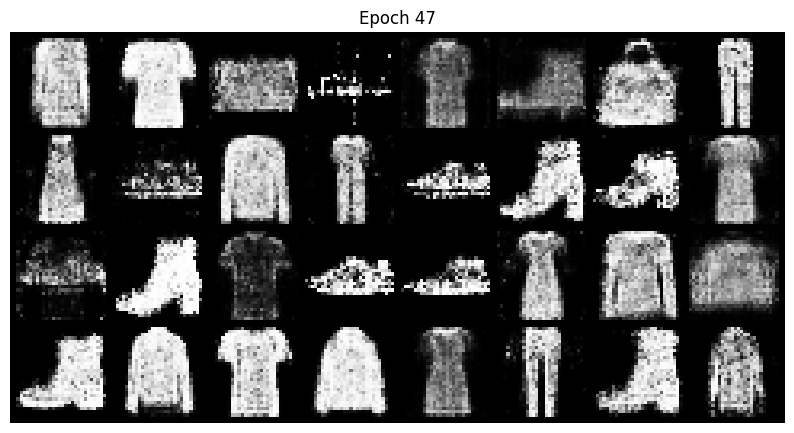

Epoch [48/50], Step [200/938]
Epoch [48/50], Step [400/938]
Epoch [48/50], Step [600/938]
Epoch [48/50], Step [800/938]
Epoch [48/50], Step [938/938], d_loss: 1.1341, g_loss: 1.0600


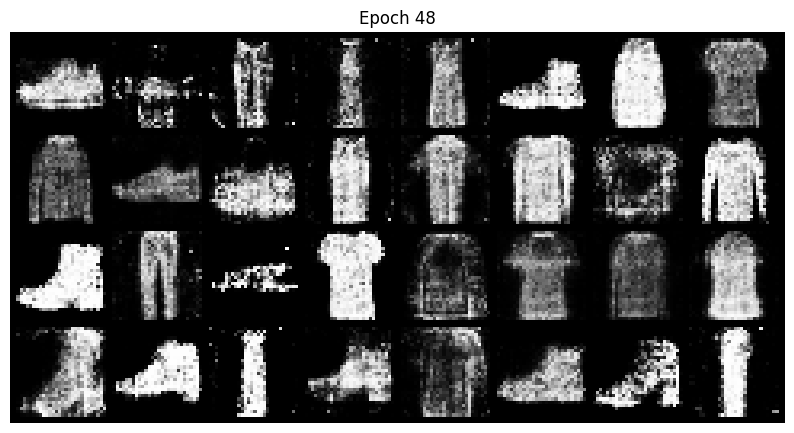

Epoch [49/50], Step [200/938]
Epoch [49/50], Step [400/938]
Epoch [49/50], Step [600/938]
Epoch [49/50], Step [800/938]
Epoch [49/50], Step [938/938], d_loss: 0.9505, g_loss: 1.1856


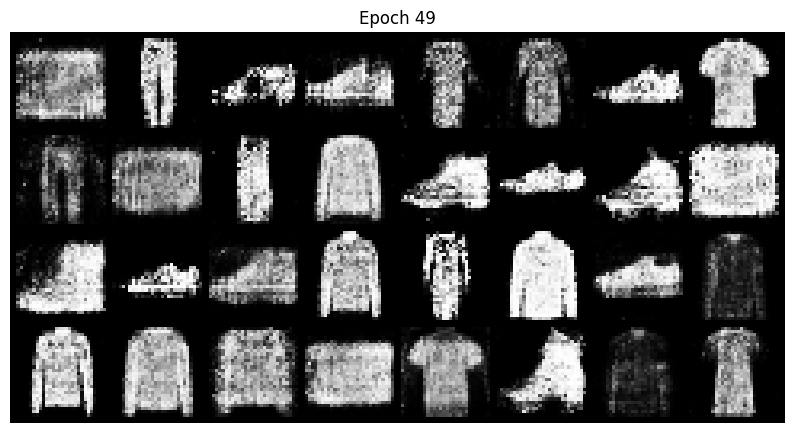

Epoch [50/50], Step [200/938]
Epoch [50/50], Step [400/938]
Epoch [50/50], Step [600/938]
Epoch [50/50], Step [800/938]
Epoch [50/50], Step [938/938], d_loss: 1.3896, g_loss: 0.8922


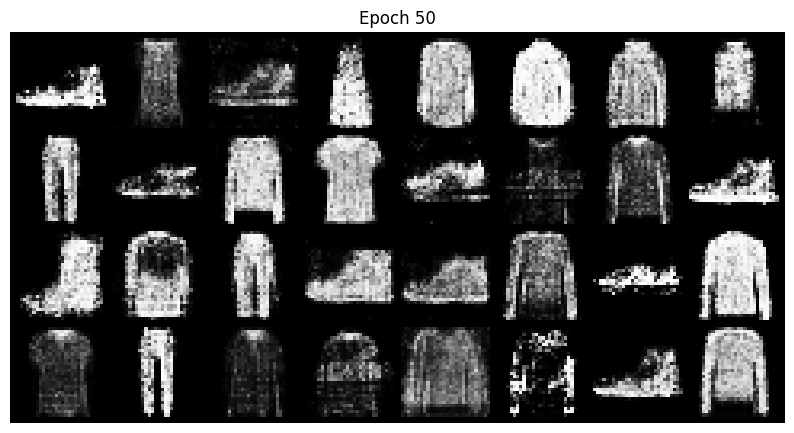

Saving checkpoint 50
Training finished


In [86]:
"""
This can be used to start from a checkpoint

# Indicate the checkpoint here
checkpoint_path = './gan_checkpoints/'

# Load the checkpoint
checkpoint = torch.load(checkpoint_path)

# Restore the state of each model and optimizer
generator.load_state_dict(checkpoint['generator_state_dict'])
discriminator.load_state_dict(checkpoint['discriminator_state_dict'])
g_optimizer.load_state_dict(checkpoint['g_optimizer_state_dict'])
d_optimizer.load_state_dict(checkpoint['d_optimizer_state_dict'])
"""

# Set the checkpoint directory
checkpoint_dir = './gan_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Function to show images after each epoch
def show_generated_images(images, num_images=64, title='Generated Images'):
    plt.figure(figsize=(10, 10))
    images = images / 2 + 0.5
    images = images.clamp(0, 1)
    image_grid = make_grid(images[:num_images], nrow=8, normalize=False).cpu().numpy()
    plt.imshow(np.transpose(image_grid, (1, 2, 0)), interpolation='nearest')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Loss lists for plotting
g_loss_curve = []
d_loss_curve = []

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(trainloader):
        # Make sure the batch size matches the available samples, usually 64
        current_batch_size = real_images.size(0)
        real_images = real_images.to(device)
        
        # Create labels for real and fake images
        real_labels = torch.ones(current_batch_size, 1).to(device)
        fake_labels = torch.zeros(current_batch_size, 1).to(device)
        
        d_optimizer.zero_grad()
        
        # Learn from real images
        real_outputs = discriminator(real_images)
        d_loss_real = criterion(real_outputs, real_labels)
        
        # Generate fake images and learn from them
        z = torch.randn(current_batch_size, 100).to(device)
        fake_images = generator(z)
        fake_outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(fake_outputs, fake_labels)
        
        # Discriminator backprop
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        d_optimizer.step()
        
        g_optimizer.zero_grad()
        
        # Generator learning and backprop
        fake_outputs = discriminator(fake_images)
        g_loss = criterion(fake_outputs, real_labels)
        
        g_loss.backward()
        g_optimizer.step()
        
        g_loss_curve.append(g_loss.item())
        d_loss_curve.append(d_loss.item())
        
        # Print progress every 200 iterations
        if (i+1) % 200 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(trainloader)}]')
            
    # Print progress and show images every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(trainloader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')
    show_generated_images(fake_images.view(-1, 1, 28, 28), title=f'Epoch {epoch+1}')
        
    # Save checkpoint every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Saving checkpoint {epoch + 1}")
        checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch + 1}.pth')
        torch.save({
            'epoch': epoch+1,
            'generator_state_dict': generator.state_dict(),
            'discriminator_state_dict': discriminator.state_dict(),
            'g_optimizer_state_dict': g_optimizer.state_dict(),
            'd_optimizer_state_dict': d_optimizer.state_dict(),
            'loss': {'g_loss': g_loss.item(), 'd_loss': d_loss.item()},
        }, checkpoint_path)
            
print("Training finished")

### 5. Visualization

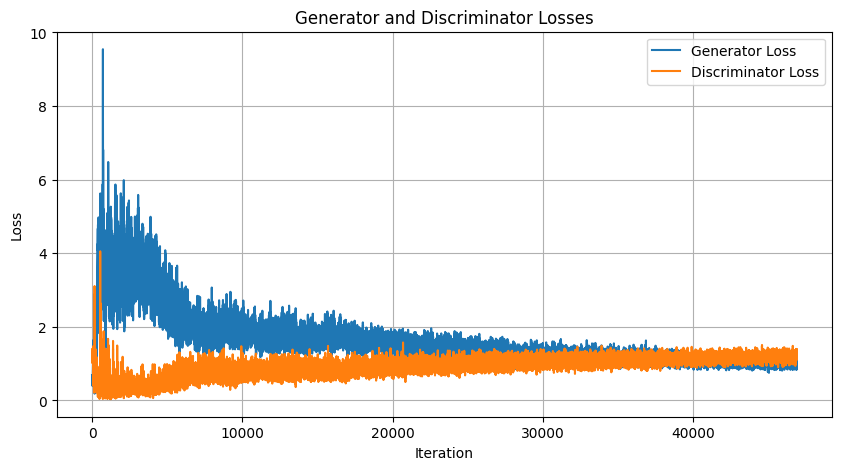

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(g_loss_curve, label = "Generator Loss")
plt.plot(d_loss_curve, label = "Discriminator Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Generator and Discriminator Losses")
plt.legend()
plt.grid(True)
plt.show()